In [49]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [50]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [51]:
NUM_CLASSES = 5

# 入力長

In [52]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [53]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [54]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [56]:
use_lstm = False
model = 'test'

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [57]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 24)                792       
                                                                 
 dropout_7 (Dropout)         (None, 24)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                250       
                                                                 
 dense_11 (Dense)            (None, 5)                 55        
                                                                 
Total params: 1,097
Trainable params: 1,097
Non-trainable params: 0
_________________________________________________________________


In [58]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [59]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [60]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/32 [..............................] - ETA: 10s - loss: 1.6030 - accuracy: 0.2891
Epoch 1: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 1s 6ms/step - loss: 1.5761 - accuracy: 0.3827 - val_loss: 1.5486 - val_accuracy: 0.5208
Epoch 2/1000
 1/32 [..............................] - ETA: 0s - loss: 1.5441 - accuracy: 0.4453
Epoch 2: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 1.5277 - accuracy: 0.3435 - val_loss: 1.4973 - val_accuracy: 0.2887
Epoch 3/1000
 1/32 [..............................] - ETA: 0s - loss: 1.5145 - accuracy: 0.3203
Epoch 3: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 1.4810 - accuracy: 0.3445 - val_loss: 1.4438 - val_accuracy: 0.5327
Epoch 4/1000
 1/32 [..............................] - ETA: 0s - lo

In [61]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [62]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 42ms/step
[0.8970943  0.01807771 0.01647638 0.01830143 0.05005023]
0


# 混同行列

42/42 [==============================] - 0s 812us/step


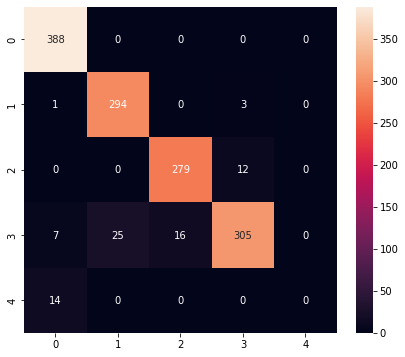

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       388
           1       0.92      0.99      0.95       298
           2       0.95      0.96      0.95       291
           3       0.95      0.86      0.91       353
           4       0.00      0.00      0.00        14

    accuracy                           0.94      1344
   macro avg       0.75      0.76      0.76      1344
weighted avg       0.93      0.94      0.94      1344



/Users/joshuacaponigro/Desktop/hand-gesture-remote/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joshuacaponigro/Desktop/hand-gesture-remote/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joshuacaponigro/Desktop/hand-gesture-remote/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [64]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [65]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [66]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/ws/w8qcztb56636d8tgqw6dksb80000gn/T/tmpo8s5na3v/assets


INFO:tensorflow:Assets written to: /var/folders/ws/w8qcztb56636d8tgqw6dksb80000gn/T/tmpo8s5na3v/assets
2022-05-20 00:46:51.472502: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-05-20 00:46:51.472531: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-05-20 00:46:51.472731: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/ws/w8qcztb56636d8tgqw6dksb80000gn/T/tmpo8s5na3v
2022-05-20 00:46:51.474675: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-05-20 00:46:51.474698: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /var/folders/ws/w8qcztb56636d8tgqw6dksb80000gn/T/tmpo8s5na3v
2022-05-20 00:46:51.480219: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-05-20 00:46:51.506808: I tensorflow/cc/saved_model/loader.cc:212] Running initialization

6472

# 推論テスト

In [67]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [68]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_4:0', 'index': 0, 'shape': array([ 1, 32], dtype=int32), 'shape_signature': array([-1, 32], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [69]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [70]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 36 µs, sys: 6 µs, total: 42 µs
Wall time: 47.2 µs


In [71]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.8970943  0.01807772 0.01647638 0.01830143 0.05005023]
0
